# 📝 Pattern Recognition & Biometrics. TP Apprentissage profond ou *Deep Learning*

Par Omar Galarraga et Sonia Garcia

Dans ce travail pratique, nous verrons l'intérêt des modèles d'apprentissage profond (*Deep Learning*) en les comparant à des modèles de *Machine Learning* classiques (non profonds).  

Nous voudrons identifier les animaux et les objets à partir des images de la base de données CIFAR 10 (https://www.cs.toronto.edu/%7Ekriz/cifar.html). 

Commençons par charger les données...


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 47s 0us/step


A manière d'exemple, nous afficherons 3 images de chaque classe :

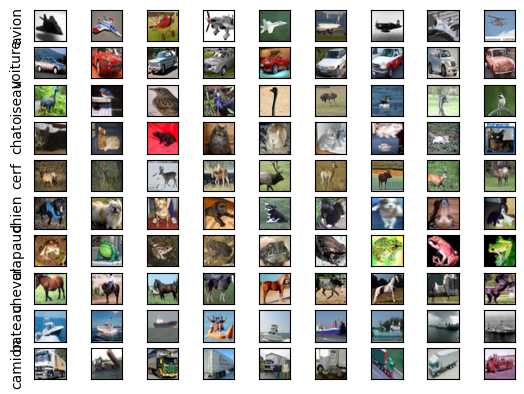

In [6]:
import tensorflow as tf

from tensorflow import keras
from keras import datasets
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten

(data_train, target_train), (data_test, target_test) = tf.keras.datasets.cifar10.load_data()

import matplotlib.pyplot as plt
import numpy as np
classes = ['avion', 'voiture', 'oiseau', 'chat', 'cerf', 
            'chien', 'crapaud', 'cheval', 'bateau', 'camion']

# Normalisation des valeurs des pixels entre 0 and 1
data_train, data_test = data_train / 255.0, data_test / 255.0

n_images = 9

plt.figure(figsize=(10,10))
for i in range(len(classes)):
  idx = np.where(target_train == i)
  #print(idx)
  for j in range(n_images): 
    plt.subplot(len(classes),n_images,n_images*i+j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data_train[idx[0][j]])
    if j == 0:
        plt.ylabel(classes[target_train[idx[0][j]][0]])
plt.show()


## Partie I. *Feedforward Neural Network* à une seule couche cachée

Nous construisons un réseau de neurones avec $N_{H_l} = 1$ couche cachée et $m=32$ neurones dans la couche cachée. 

* I.1) Si on considère les images "brutes", quelle est la dimension de la "couche" d'entrée ?
* I.2) Quelle est la performance du modèle sur les ensembles d'apprentissage et de test ?

In [ ]:
m=32
refmodel = tf.keras.Sequential()
refmodel.add(Flatten(input_shape=data_train[0].shape))
refmodel.add(Dense(m, activation='sigmoid'))
refmodel.add(Dense(len(classes)))

refmodel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history1 = refmodel.fit(data_train, target_train, epochs=20, 
                        validation_data=(data_test, target_test), batch_size=64)

Optimisez le nombre de neurones dans la couche cachée dans l'intervalle $m = \left[2,128\right]$
* I.3) Quelle est la valeur optimale de $ m $ ?
* I.4) Quelles sont les nouvelles performances en apprentissage et en test ?

In [ ]:
#Ecrivez votre code ici


Montrez la matrice de confusion du modèle optimal sur l'ensemble de test

* I.4) Quelle est la prédiction "préférée" du modèle ?
* I.5) Quelle est la classe la mieux prédite ? Justifiez brièvement

In [ ]:
#Ecrivez votre code ici


## Partie II. *Feedforward Neural Networks* à plusieurs couches

Construisez et entraînez un réseau de neurones type Perceptron Multicouche (PMC) à $N_{H_l} = 3$ couches cachées et avec $m_1=32, m_2=16, m_3 = 16$ neurones respectivement pour les couches cachées 1, 2 et 3.

* II.1) Combien de paramètres sont-ils optimisés au total ? 
* II.2) Quelle est la performance en apprentissage et validation ?
* II.3) Montrez la matrice de confusion

In [ ]:
#Ecrivez votre code ici


## Partie III. Réseaux de neurones convolutionnels (*CNN*)


Créez un CNN à l'image de *LeNet-5* (LeCun et al., 1998), qui consiste en une double alternance entre une couche convolutionnelle ($m=32$, kernel de $5x5$) et une couche de *Maximum Pooling* (kernel de $2x2$), suivie d'une couche dense ($m=64$).

In [ ]:
#Ecrivez votre code ici



* III.1) Combien de paramètres arrivent-ils en entrée de la couche dense ?
* III.2) Combien de paramètres sont-ils entraînés au total ?
* III.3) Quelle est la performance d'apprentissage et de validation ?

In [ ]:
#Ecrivez votre code ici


## Partie IV. Transfer learning

Avec l'immense progression récente du Deep Learning, il est souvent plus intéressant de créer un modèle à partir d'un autre modèle déjà entraîné et l'ajuster (*fine-tune*) selon la tâche spécifique que l'on veut réaliser. Actuellement un large catalogue de modèles très complexes entraînés sur des bases de données de très grande taille est à disposition du public général.   

Commençons par créer un réseau type *ResNet-18* (He et al., 2015) pré-entraîné sur la base de données *ImageNet*

In [ ]:
#import torch 
from tensorflow.keras.applications import ResNet50

#resnet = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True) 

ResNet50_model = ResNet50(
    include_top=False, 
    weights='imagenet', 
    input_shape= (32, 32, 3),
    pooling='avg')

tl_cnn = Sequential()
tl_cnn.add(ResNet50_model)
tl_cnn.add(Flatten())
tl_cnn.add(Dense(10, activation='softmax'))
tl_cnn.summary()

Maintenant on ajuste le modèle pré-entraîné à notre problème spécifique (*fine-tuning*) 
(Il est préférable d'utiliser un GPU. Par exemple, Google Colab, Codesphere, Gradient by Paperspace, Kaggle, proposent des GPU gratuitement)

In [ ]:
tl_cnn.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history4 = tl_cnn.fit(data_train, target_train, epochs=20, validation_data=(data_test, target_test))

Remplissez le tableau ci-dessous selon les différentes méthodes de classification testées.

| Classifieur        | Perf Apprentissage | Perf Test | 
|--------------------|--------------------|-----------|
| *FNN* simple       |  |  |  
| *FNN* profond      |  |  | 
| *CNN*              |  |  | 
| *ResNet50*         |  |  | 

* IV.1) Quel est le meilleur classifieur ? Justifiez


IV.2) Pendant quelques années les modèles ResNet ont été le *silver standard* dans la classification d'images. Plus récemment, une autre famille de modèles appelée *ConvNet* (Liu et al., 2022) a montré des meilleures performances. Refaite l'expérience précédente en partant d'un modèle *ConvNet* pré-entraîné. 
(Il est préférable d'utiliser un GPU. Par exemple, Google Colab, Codesphere, Gradient by Paperspace, Kaggle, proposent des GPU gratuitement)  

In [ ]:
#Ecrivez votre code ici